Equipe formada pelos membros:

João Pedro Almeida de Albuquerque

Importação da base de dados escolhida. A breast Cancer.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='classe')

Carregamento do dataSet

In [2]:
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='classe')  # 0 = maligno, 1 = benigno

dados = X.copy()
dados['classe'] = y

# Visualizar as primeiras linhas do dataSet com a criação da coluna CLASSE
print(dados.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Normalização dos dados

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

Treinamento e avaliação com o KNN

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN com k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Acurácia do KNN com k=3: {accuracy_3:.2f}")

# KNN com k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
accuracy_5 = accuracy_score(y_test, y_pred_5)
print(f"Acurácia do KNN com k=5: {accuracy_5:.2f}")

Acurácia do KNN com k=3: 0.97
Acurácia do KNN com k=5: 0.96


Cross validation com K FOLD obtendo média e desvio padrão com K=5 e K=3

In [5]:
from sklearn.model_selection import KFold
import numpy as np

# Configuração do K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies_k3 = []
accuracies_k5 = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Modelo com k=3
    knn_3 = KNeighborsClassifier(n_neighbors=3)
    knn_3.fit(X_train, y_train)
    accuracies_k3.append(knn_3.score(X_test, y_test))

    # Modelo com k=5
    knn_5 = KNeighborsClassifier(n_neighbors=5)
    knn_5.fit(X_train, y_train)
    accuracies_k5.append(knn_5.score(X_test, y_test))

print(f"Média acurácia KNN com k=3: {np.mean(accuracies_k3):.2f}, Desvio padrão: {np.std(accuracies_k3):.2f}")
print(f"Média acurácia KNN com k=5: {np.mean(accuracies_k5):.2f}, Desvio padrão: {np.std(accuracies_k5):.2f}")


Média acurácia KNN com k=3: 0.97, Desvio padrão: 0.02
Média acurácia KNN com k=5: 0.97, Desvio padrão: 0.02


Cluesterização com K-MENS

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

dados['cluster'] = clusters

print(dados['cluster'].value_counts())

comparacao = dados.groupby('cluster')['classe'].value_counts()
print(comparacao)


cluster
3    250
2    152
1    128
0     39
Name: count, dtype: int64
cluster  classe
0        0          39
1        1         124
         0           4
2        0         148
         1           4
3        1         229
         0          21
Name: count, dtype: int64


Histrogramas e BloxPots

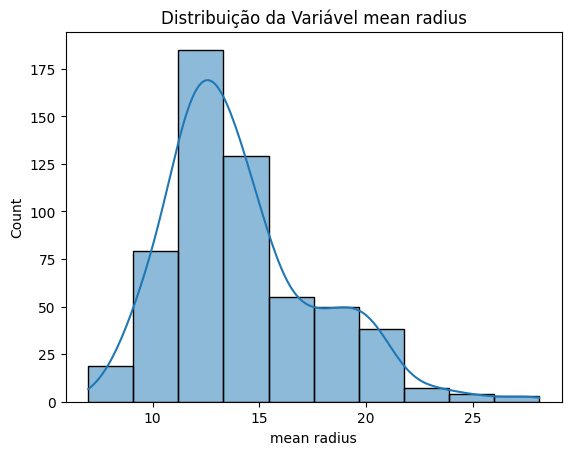

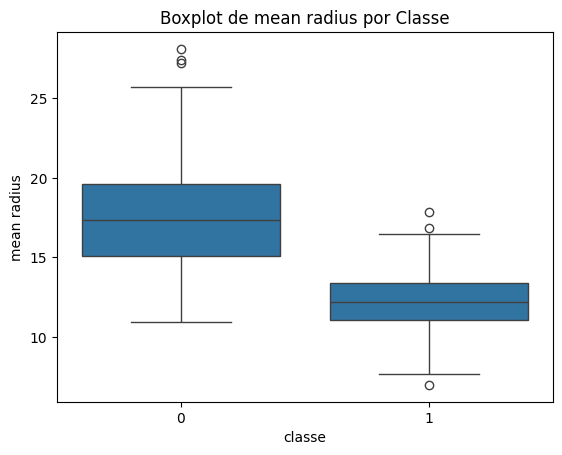

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de uma variável
sns.histplot(dados, x='mean radius', bins=10, kde=True)
plt.title('Distribuição da Variável mean radius')
plt.show()

# Boxplot segregado por classe
sns.boxplot(x='classe', y='mean radius', data=dados)
plt.title('Boxplot de mean radius por Classe')
plt.show()

Análise de características em relação as classes para identificar a partir de características se um tumor pode ser benigno ou maligno gerando um HeatMap que pode revelar agrupamentos de variáveis altamente correlacionadas, ajudando a identificar redundâncias ou grupos de características relacionadas.

Correlação das variáveis com a classe:
classe                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter           

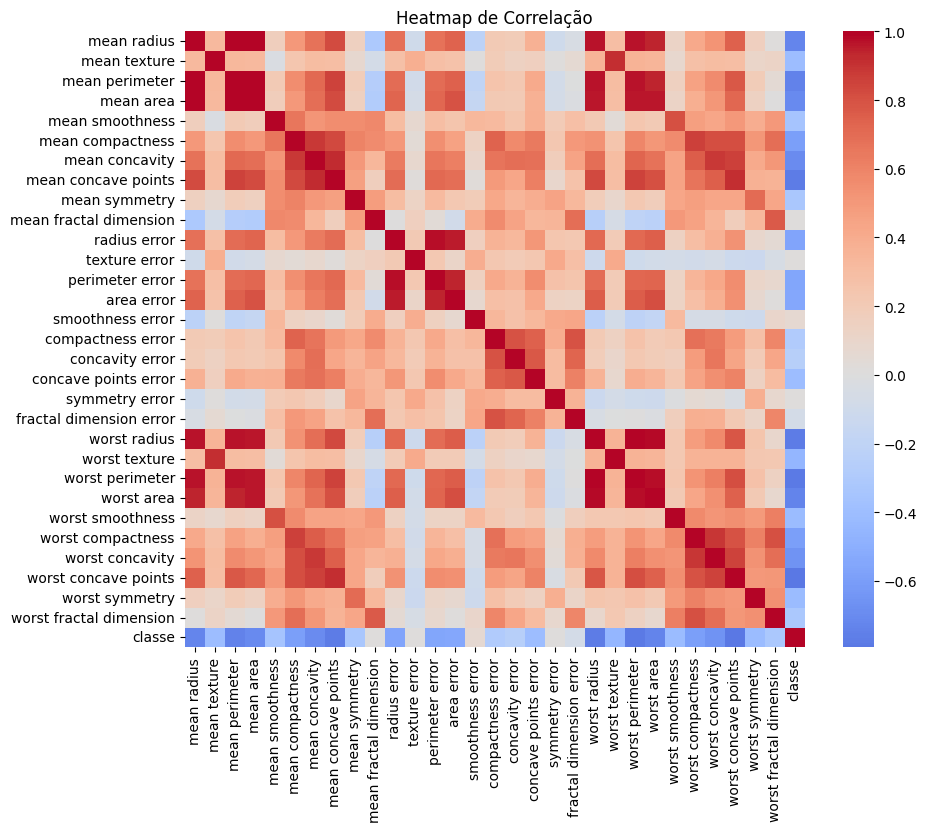

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_scaled_df['classe'] = y.reset_index(drop=True)

correlation_matrix = X_scaled_df.corr()

class_correlation = correlation_matrix['classe'].sort_values(ascending=False)

print("Correlação das variáveis com a classe:")
print(class_correlation)

# Heatmap das correlações (opcionalmente, focar nas variáveis mais correlacionadas)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlação')
plt.show()